Classify origin of wine based on physio-chemical analysis data. 

Details are here: http://archive.ics.uci.edu/ml/datasets/Wine).

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sb

## Read in the data 

#### Data set

In [2]:
df = pd.read_csv('../Data/wine.data.csv', header=None)
df.columns = ['Class', 'Alcohol', 'Malic acid', 'Ash', 'Alcalinity of ash', 'Magnesium', 'Total phenols', 'Flavanoids', 'Nonflavanoid phenols', 'Proanthocyanins', 'Color intensity', 'Hue', 'OD280/OD315 of diluted wines', 'Proline']
df.head(10)

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735
5,1,14.20,1.76,2.45,15.2,112,3.27,3.39,0.34,1.97,6.75,1.05,2.85,1450
6,1,14.39,1.87,2.45,14.6,96,2.50,2.52,0.30,1.98,5.25,1.02,3.58,1290
7,1,14.06,2.15,2.61,17.6,121,2.60,2.51,0.31,1.25,5.05,1.06,3.58,1295
8,1,14.83,1.64,2.17,14.0,97,2.80,2.98,0.29,1.98,5.20,1.08,2.85,1045
9,1,13.86,1.35,2.27,16.0,98,2.98,3.15,0.22,1.85,7.22,1.01,3.55,1045


In [3]:
len(df.columns)

14

In [4]:
print(df.groupby("Class").mean())

         Alcohol  Malic acid       Ash  Alcalinity of ash   Magnesium  \
Class                                                                   
1      13.744746    2.010678  2.455593          17.037288  106.338983   
2      12.278732    1.932676  2.244789          20.238028   94.549296   
3      13.153750    3.333750  2.437083          21.416667   99.312500   

       Total phenols  Flavanoids  Nonflavanoid phenols  Proanthocyanins  \
Class                                                                     
1           2.840169    2.982373              0.290000         1.899322   
2           2.258873    2.080845              0.363662         1.630282   
3           1.678750    0.781458              0.447500         1.153542   

       Color intensity       Hue  OD280/OD315 of diluted wines      Proline  
Class                                                                        
1             5.528305  1.062034                      3.157797  1115.711864  
2             3.086620  

In [5]:
print(df.groupby("Class").median())

       Alcohol  Malic acid   Ash  Alcalinity of ash  Magnesium  Total phenols  \
Class                                                                           
1       13.750       1.770  2.44               16.8      104.0          2.800   
2       12.290       1.610  2.24               20.0       88.0          2.200   
3       13.165       3.265  2.38               21.0       97.0          1.635   

       Flavanoids  Nonflavanoid phenols  Proanthocyanins  Color intensity  \
Class                                                                       
1           2.980                  0.29            1.870             5.40   
2           2.030                  0.37            1.610             2.90   
3           0.685                  0.47            1.105             7.55   

         Hue  OD280/OD315 of diluted wines  Proline  
Class                                                
1      1.070                          3.17   1095.0  
2      1.040                          2.83    

In [6]:
df["Class"].value_counts()

2    71
1    59
3    48
Name: Class, dtype: int64

In [7]:
df.describe()

,Class,Alcohol,Malic acid,Ash,Alcalinity of ash,Magnesium,Total phenols,Flavanoids,Nonflavanoid phenols,Proanthocyanins,Color intensity,Hue,OD280/OD315 of diluted wines,Proline
count,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348,2.366517,19.494944,99.741573,2.295112,2.029270,0.361854,1.590899,5.058090,0.957449,2.611685,746.893258
std,0.775035,0.811827,1.117146,0.274344,3.339564,14.282484,0.625851,0.998859,0.124453,0.572359,2.318286,0.228572,0.709990,314.907474
min,1.000000,11.030000,0.740000,1.360000,10.600000,70.000000,0.980000,0.340000,0.130000,0.410000,1.280000,0.480000,1.270000,278.000000
25%,1.000000,12.362500,1.602500,2.210000,17.200000,88.000000,1.742500,1.205000,0.270000,1.250000,3.220000,0.782500,1.937500,500.500000
50%,2.000000,13.050000,1.865000,2.360000,19.500000,98.000000,2.355000,2.135000,0.340000,1.555000,4.690000,0.965000,2.780000,673.500000
75%,3.000000,13.677500,3.082500,2.557500,21.500000,107.000000,2.800000,2.875000,0.437500,1.950000,6.200000,1.120000,3.170000,985.000000
max,3.000000,14.830000,5.800000,3.230000,30.000000,162.000000,3.880000,5.080000,0.660000,3.580000,13.000000,1.710000,4.000000,1680.000000


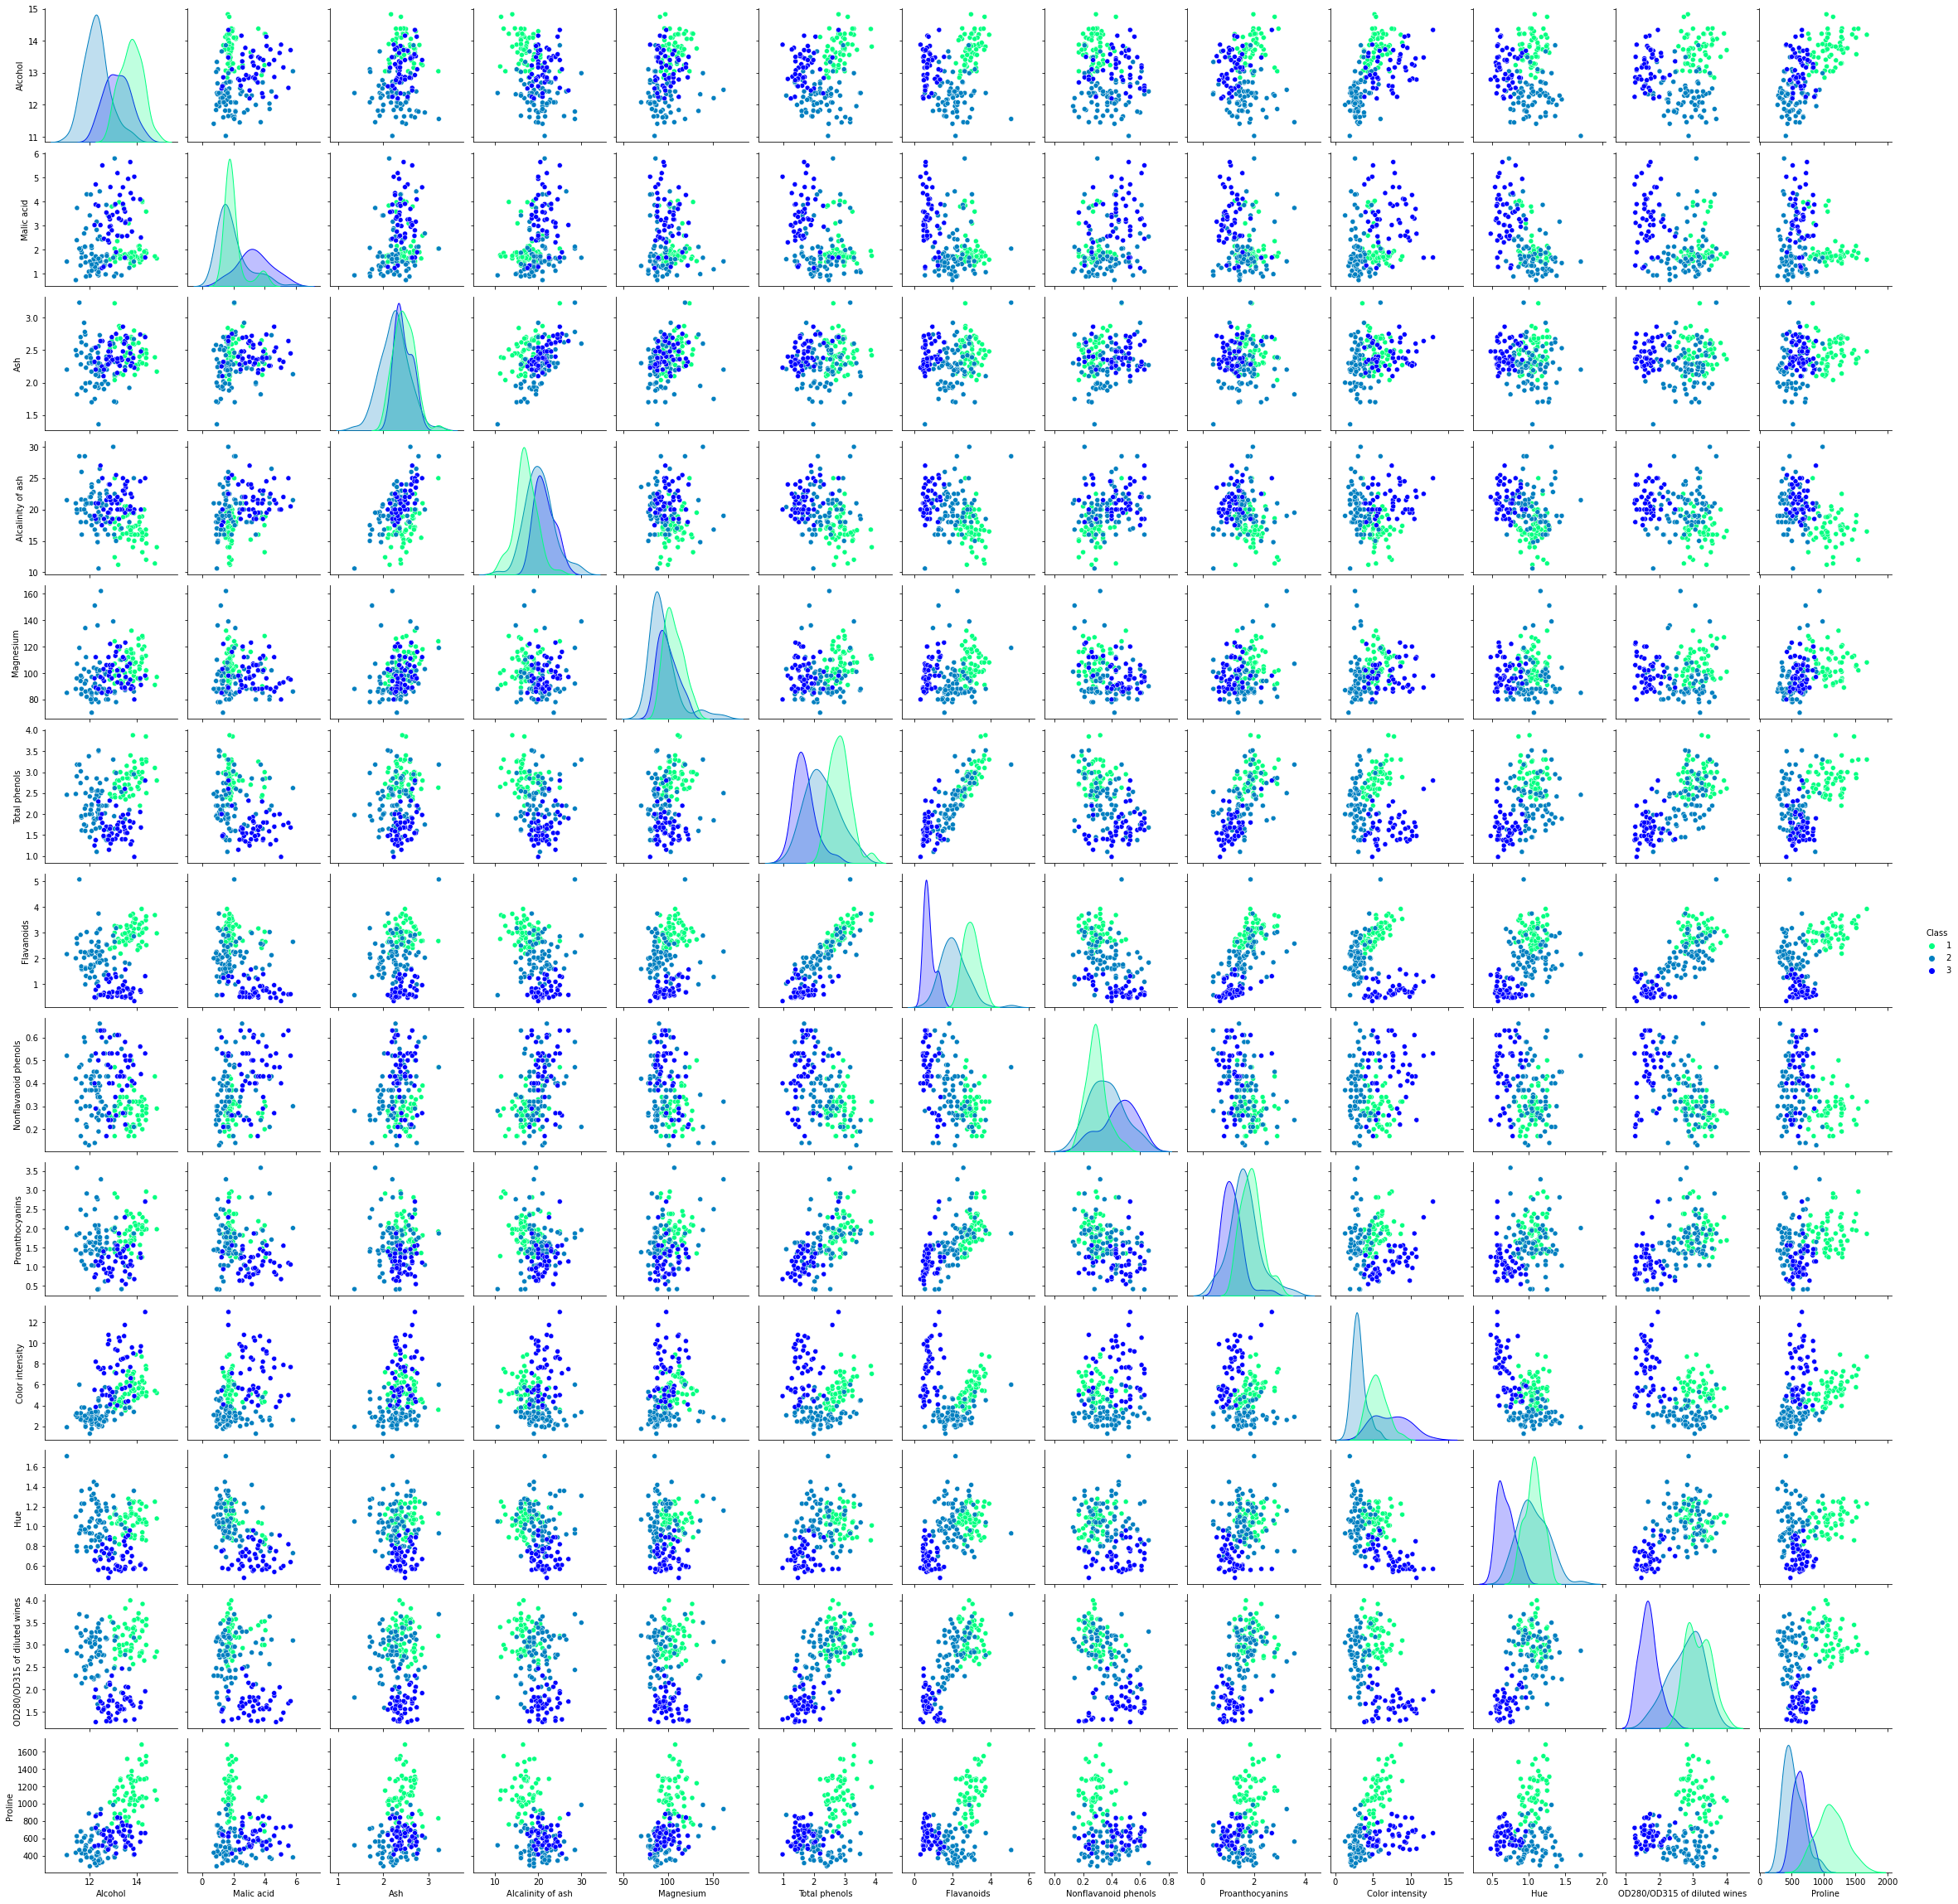

In [8]:

sb.pairplot(df, diag_kind = 'kde', hue = "Class", palette = "winter_r")

<AxesSubplot:>

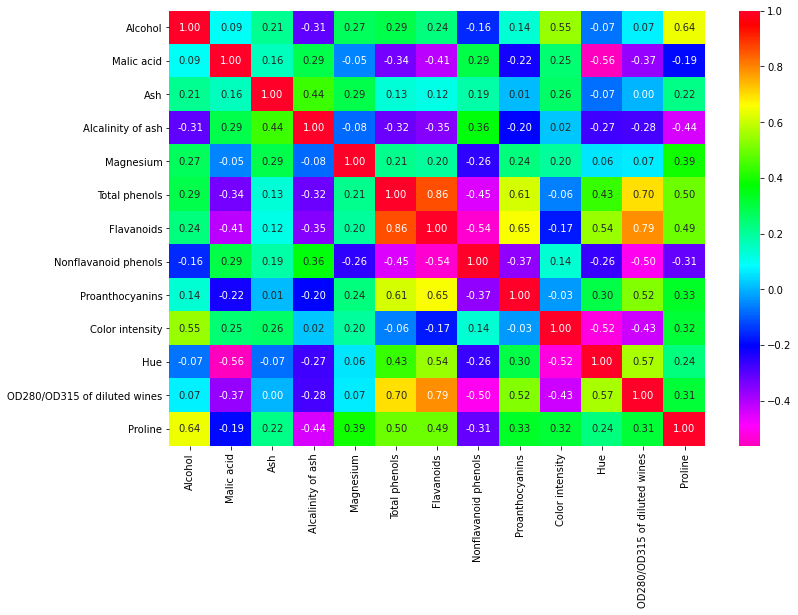

In [9]:
corr = df[df.columns[1:14]].corr()
fig, ax = plt.subplots(figsize=(12, 8))

sb.heatmap(corr, cmap="gist_rainbow_r", annot = True, fmt=".2f")

<AxesSubplot:xlabel='Class', ylabel='Alcohol'>

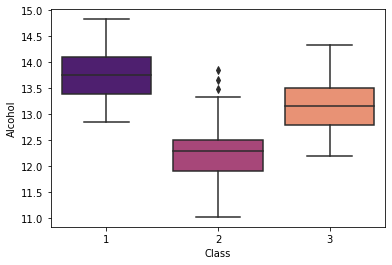

In [10]:

sb.boxplot(x = "Class", y = "Alcohol", palette = "magma", data = df)



<AxesSubplot:xlabel='Class', ylabel='Malic acid'>

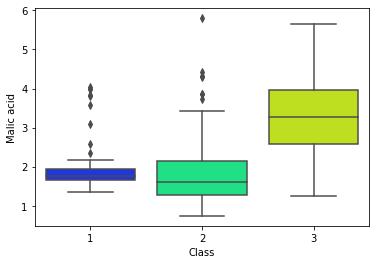

In [11]:
sb.boxplot(x = "Class", y = "Malic acid", palette = "gist_rainbow_r", data = df)



<AxesSubplot:xlabel='Class', ylabel='Ash'>

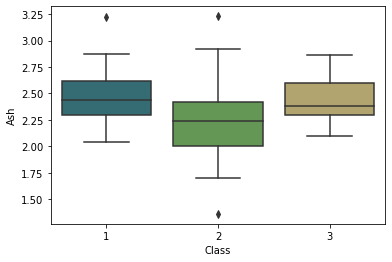

In [12]:
sb.boxplot(x = "Class", y = "Ash", palette = "gist_earth",data = df)


<AxesSubplot:xlabel='Class', ylabel='Alcalinity of ash'>

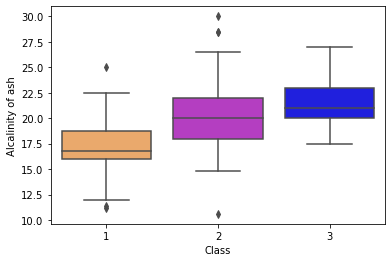

In [13]:
sb.boxplot(x = "Class", y = "Alcalinity of ash", palette = "gnuplot2_r",data = df)


<AxesSubplot:xlabel='Class', ylabel='Magnesium'>

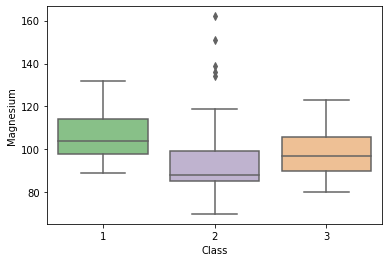

In [14]:
sb.boxplot(x = "Class", y = "Magnesium",palette = "Accent", data = df)


<AxesSubplot:xlabel='Class', ylabel='Total phenols'>

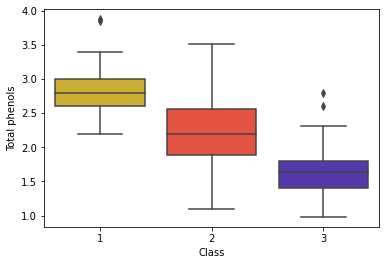

In [15]:
sb.boxplot(x = "Class", y = "Total phenols",palette = "CMRmap_r", data = df)


<AxesSubplot:xlabel='Class', ylabel='Flavanoids'>

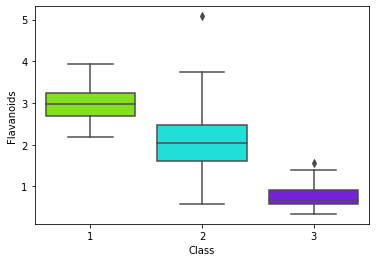

In [16]:
sb.boxplot(x = "Class", y = "Flavanoids", palette = "hsv",data = df)


<AxesSubplot:xlabel='Class', ylabel='Nonflavanoid phenols'>

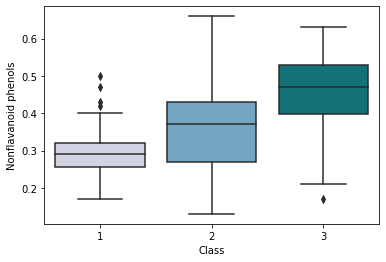

In [17]:
sb.boxplot(x = "Class", y = "Nonflavanoid phenols",palette = "PuBuGn", data = df)


<AxesSubplot:xlabel='Class', ylabel='Proanthocyanins'>

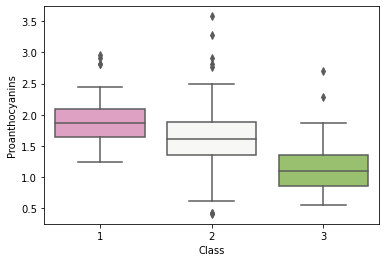

In [18]:
sb.boxplot(x = "Class", y = "Proanthocyanins", palette = "PiYG",data = df)


<AxesSubplot:xlabel='Class', ylabel='Color intensity'>

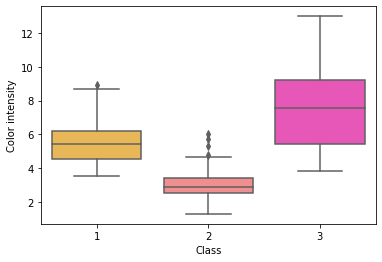

In [19]:
sb.boxplot(x = "Class", y = "Color intensity", palette = "spring_r",data = df)


<AxesSubplot:xlabel='Class', ylabel='Hue'>

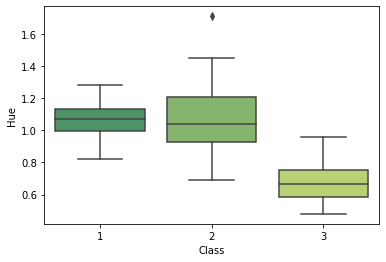

In [20]:
sb.boxplot(x = "Class", y = "Hue", palette = "summer",data = df)


<AxesSubplot:xlabel='Class', ylabel='OD280/OD315 of diluted wines'>

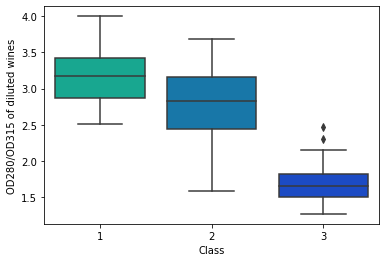

In [21]:
sb.boxplot(x = "Class", y = "OD280/OD315 of diluted wines", palette = "winter_r",data = df)

<AxesSubplot:xlabel='Class', ylabel='Proline'>

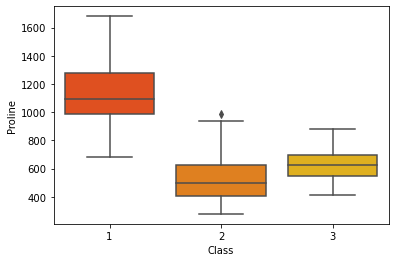

In [22]:
sb.boxplot(x = "Class", y = "Proline", palette = "autumn",data = df)

/Users/ryanjeon/opt/anaconda3/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Total phenols', ylabel='Flavanoids'>

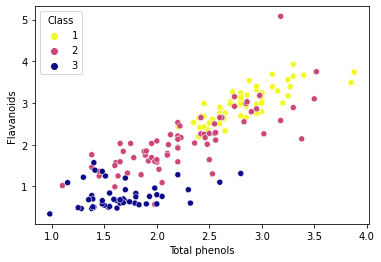

In [23]:
sb.scatterplot(df["Total phenols"], df["Flavanoids"], hue = df["Class"], palette = "plasma_r")

#### Describe the basic statistics of the features

#### Make boxplots by output labels/classes - do any features classify the wine based on these figures?

If so (and hint, they do!), make a scatter plot showing the correlation of two features showing the correlation of two features and class separation by these features

####  Naive Bayes Classification

Use [Naive Bayes Classification](https://scikit-learn.org/stable/modules/generated/sklearn.naive_bayes.GaussianNB.html) to create a model to classify wine base on attributes.  Justify how good the model is for the wine classification.  Note that some of the metrics we've used in class are only for *binary* classifications, so may not eb applicable here.


In [42]:
%matplotlib inline
import matplotlib.pyplot as plt
import csv
import pandas
import sklearn
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC, LinearSVC
from sklearn.metrics import classification_report, f1_score, accuracy_score, confusion_matrix
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold, cross_val_score, train_test_split 
from sklearn.tree import DecisionTreeClassifier 
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import learning_curve
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB
from sklearn import svm #support vector Machine



In [25]:
# I don't think we need class in our training/testing dataset- so I think I will remove it using the df.drop function

dropped_class_df = df.drop(columns = 'Class') 
wine_class = df['Class'] # i can always make it, its own variable too in case I need it
xtrain, xtest, ytrain, ytest = train_test_split(dropped_class_df, wine_class, test_size = 0.25, random_state = 10)

In [26]:
# curious to know why Jupyter notebook omits the 1 after 133 and 45
# anyways, this is a good test to see if you did things right. You'd want more training than ur test

print("xtrain shape: ",xtrain.shape)
print("ytrain shape: ",ytrain.shape)
print("")
print("ytest shape",ytest.shape)
print("xtest shape: ", xtest.shape)

xtrain shape:  (133, 13)
ytrain shape:  (133,)

ytest shape (45,)
xtest shape:  (45, 13)


In [28]:
# I am actually going to perform the Naive Bayes algorithm a little differently
# here I instantiate an object of the GaussianNB class
# then I fit my xtrain and ytrain 

nb = GaussianNB()
nb.fit(xtrain, ytrain)

cv_nb = cross_val_score(estimator = nb, X = xtrain, y = ytrain, cv = 10)
print("CV Score: ", cv_nb.mean())

nb_train = nb.predict(xtrain)
accuracy_nb_train = accuracy_score(ytrain, nb_train)
print("Accuracy of Training set: ", accuracy_nb_train)

nb_test = nb.predict(xtest)
accuracy_nb_test = accuracy_score(ytest, nb_test)
print("Accuracy of Test set: ", accuracy_nb_test)

confusion_matrix(ytest, nb_test)


CV Score:  0.9708791208791208
Accuracy of Training set:  0.9849624060150376
Accuracy of Test set:  0.8888888888888888


array([[13,  0,  0],
       [ 2, 18,  3],
       [ 0,  0,  9]])

In [48]:
lr = LogisticRegression(C=1, fit_intercept=True, max_iter=1000, penalty = 'l2', solver='liblinear')
lr.fit(xtrain, ytrain.ravel())

LogisticRegression(C=1, max_iter=1000, solver='liblinear')

In [47]:
# Now we are taking the model that was on the TRAINING set (xtrain) and now we are 
# evaluating it on the TESTING set (x test)


cv_lr = cross_val_score(estimator = lr, X = xtrain, y = ytrain, cv = 10)
print("CV: ", cv_lr.mean())

lr_train = lr.predict(xtrain)
accuracy_lr_train = accuracy_score(ytrain, lr_train)
print("Training set: ", accuracy_lr_train)

lr_test = lr.predict(xtest)
accuracy_lr_test = accuracy_score(ytest, lr_test)
print("Test set: ", accuracy_lr_test)

confusion_matrix(ytest, lr_test)

CV:  0.9697802197802199
Training set:  0.9849624060150376
Test set:  0.8222222222222222


array([[12,  1,  0],
       [ 5, 16,  2],
       [ 0,  0,  9]])

In [31]:
#########################################################
knn = KNeighborsClassifier(leaf_size = 1, metric = 'minkowski', n_neighbors = 30, weights = 'distance')
knn.fit(xtrain, ytrain)

KNeighborsClassifier(leaf_size=1, n_neighbors=30, weights='distance')

In [35]:
cv_knn = cross_val_score(estimator = knn, X = xtrain, y = ytrain, cv = 10)
print("CV Score: ", cv_knn.mean())

knn_train = knn.predict(xtrain)
accuracy_knn_train = accuracy_score(ytrain, knn_train)
print("Accuracy of Training set: ", accuracy_knn_train)

knn_test = knn.predict(xtest)
accuracy_knn_test = accuracy_score(ytest, knn_test)
print("Accuracy of Test set: ", accuracy_knn_test)

confusion_matrix(ytest, knn_test)



CV Score:  0.7824175824175825
Accuracy of Training set:  1.0
Accuracy of Test set:  0.6666666666666666


array([[ 8,  0,  5],
       [ 2, 14,  7],
       [ 0,  1,  8]])

In [ ]:
svm__radial = svm.SVC(kernel='rbf',C=1,gamma=0.1)
svm__radial.fit(xtrain, ytrain)

In [57]:


cv_svm__radial = cross_val_score(estimator = svm__radial, X = xtrain, y = ytrain, cv = 10)
print("CV Score: ", cv_svm__radial.mean())

svm__radial_train = svm__radial.predict(xtrain)
accuracy_radial_train = accuracy_score(ytrain, svm__radial_train)
print("Accuracy of Training set: ", accuracy_radial_train)

svm__radial_test = svm__radial.predict(xtest)
accuracy_radial_test = accuracy_score(ytest, svm__radial_test)
print("Accuracy of Test set: ", accuracy_radial_test)

confusion_matrix(ytest, svm__radial_test)

CV Score:  0.4142857142857143
Accuracy of Training set:  1.0
Accuracy of Test set:  0.5777777777777777


array([[ 1, 12,  0],
       [ 0, 23,  0],
       [ 0,  7,  2]])

In [58]:
svm_lin = svm.SVC(kernel='linear',C=0.1,gamma=0.1)
svm_lin.fit(xtrain, ytrain)

SVC(C=0.1, gamma=0.1, kernel='linear')

In [61]:
cv_svm_lin = cross_val_score(estimator = svm_lin, X = xtrain, y = ytrain, cv = 10)
print("CV Score: ", cv_svm_lin.mean())

svm__lin_train = svm_lin.predict(xtrain)
accuracy_lin_train = accuracy_score(ytrain, svm__lin_train)
print("Accuracy of Training set: ", accuracy_lin_train)

svm__lin_test = svm_lin.predict(xtest)
accuracy_lin_test = accuracy_score(ytest, svm__lin_test)
print("Accuracy of Test set: ", accuracy_lin_test)

confusion_matrix(ytest, svm__lin_test)

CV Score:  0.962087912087912
Accuracy of Training set:  0.9924812030075187
Accuracy of Test set:  0.8444444444444444


array([[12,  1,  0],
       [ 3, 17,  3],
       [ 0,  0,  9]])

In [36]:
truepos_nb = confusion_matrix(ytest, nb_test)[0,0]
falsepos_nb = confusion_matrix(ytest, nb_test)[0,1]
trueneg_nb = confusion_matrix(ytest, nb_test)[1,1]
falseneg_nb = confusion_matrix(ytest, nb_test)[1,0]

In [37]:
truepos_knn = confusion_matrix(ytest, knn_test)[0,0]
falsepos_knn = confusion_matrix(ytest, knn_test)[0,1]
trueneg_knn = confusion_matrix(ytest, knn_test)[1,1]
falseneg_knn = confusion_matrix(ytest, knn_test)[1,0]

In [38]:
truepos_lr = confusion_matrix(ytest, lr_test)[0,0]
falsepos_lr = confusion_matrix(ytest, lr_test)[0,1]
trueneg_lr = confusion_matrix(ytest, lr_test)[1,1]
falseneg_lr = confusion_matrix(ytest, lr_test)[1,0]

In [65]:
truepos_rad = confusion_matrix(ytest, svm__radial_test)[0,0]
falsepos_rad = confusion_matrix(ytest, svm__radial_test)[0,1]
trueneg_rad = confusion_matrix(ytest, svm__radial_test)[1,1]
falseneg_rad = confusion_matrix(ytest, svm__radial_test)[1,0]

In [66]:
truepos_lin = confusion_matrix(ytest, svm__lin_test)[0,0]
falsepos_lin = confusion_matrix(ytest, svm__lin_test)[0,1]
trueneg_lin = confusion_matrix(ytest, svm__lin_test)[1,1]
falseneg_lin = confusion_matrix(ytest, svm__lin_test)[1,0]

In [67]:
models = [('K-Nearest Neighbors (KNN)', truepos_knn, falsepos_knn, trueneg_knn, falseneg_knn, accuracy_knn_train, accuracy_knn_test, cv_knn.mean()),
          ('Logistic Regression', truepos_lr, falsepos_lr, trueneg_lr, falseneg_lr, accuracy_lr_train, accuracy_lr_test, cv_lr.mean()),
          ('Naive Bayes', truepos_nb, falsepos_nb, trueneg_nb, falseneg_nb, accuracy_nb_train, accuracy_nb_test, cv_nb.mean()),
          ('SVM: Radial', truepos_rad, falsepos_rad, trueneg_rad, falseneg_rad, accuracy_radial_train, accuracy_radial_test, cv_svm__radial.mean()),
          ('SVM: Linear', truepos_lin, falsepos_lin, trueneg_lin, falseneg_lin, accuracy_lin_train, accuracy_lin_test, cv_svm_lin.mean()),

         ]

summary_table = pd.DataFrame(data = models, columns=['Model Name', 'True Positives', 'False Positives', 'True Negatives','False Negatives', 'Accuracy (Training)', 'Accuracy (Test)', 'Cross-Validation'])
summary_table

,Model Name,True Positives,False Positives,True Negatives,False Negatives,Accuracy (Training),Accuracy (Test),Cross-Validation
0,K-Nearest Neighbors (KNN),8,0,14,2,1.000000,0.666667,0.782418
1,Logistic Regression,12,1,16,5,0.984962,0.822222,0.969780
2,Naive Bayes,13,0,18,2,0.984962,0.888889,0.970879
3,SVM: Radial,1,12,23,0,1.000000,0.577778,0.414286
4,SVM: Linear,12,1,17,3,0.992481,0.844444,0.962088


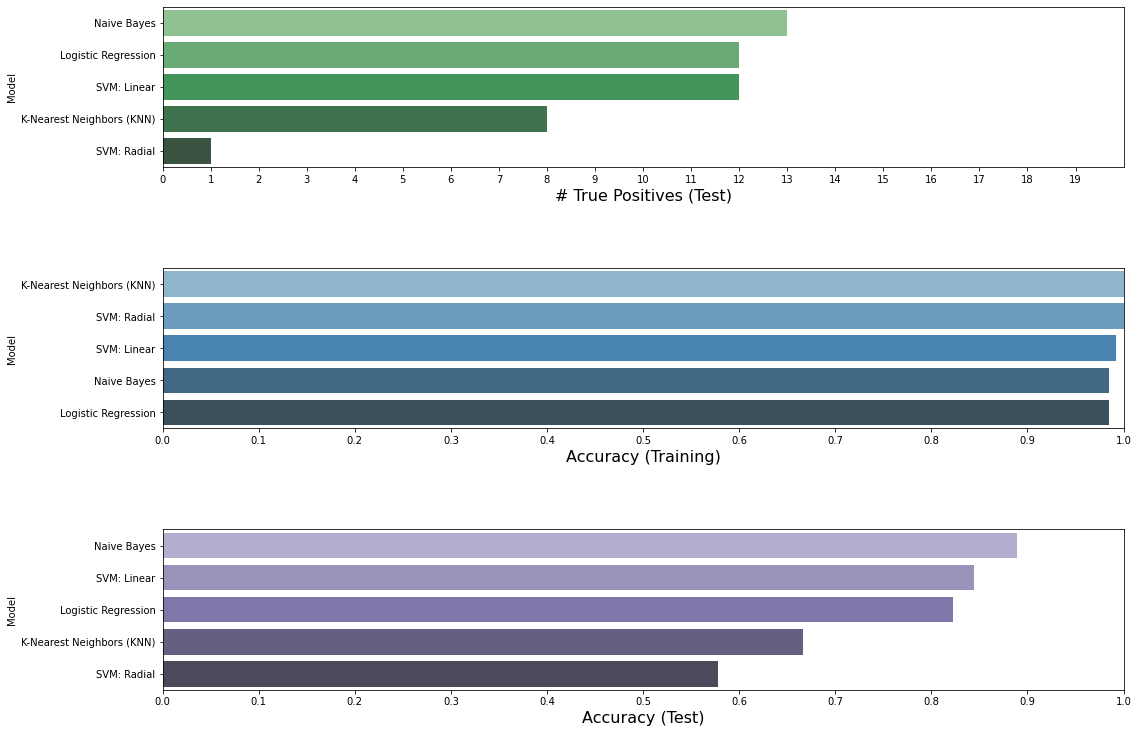

In [68]:
figz, axes = plt.subplots(3,1, figsize=(16,12))
figz.tight_layout(pad=8.0)

summary_table.sort_values(by=['True Positives'], ascending=False, inplace=True)
sb.barplot(x='True Positives', y='Model Name', data = summary_table, palette='Greens_d', ax = axes[0])
axes[0].set_xlabel('# True Positives (Test)', size=16)
axes[0].set_ylabel('Model')
axes[0].set_xlim(0,20)
axes[0].set_xticks(np.arange(0, 20))

summary_table.sort_values(by=['Accuracy (Training)'], ascending=False, inplace=True)
sb.barplot(x='Accuracy (Training)', y='Model Name', data = summary_table, palette='Blues_d', ax = axes[1])
axes[1].set_xlabel('Accuracy (Training)', size=16)
axes[1].set_ylabel('Model')
axes[1].set_xlim(0,1.0)
axes[1].set_xticks(np.arange(0, 1.1, 0.1))

summary_table.sort_values(by=['Accuracy (Test)'], ascending=False, inplace=True)
sb.barplot(x='Accuracy (Test)', y='Model Name', data = summary_table, palette='Purples_d', ax = axes[2])
axes[2].set_xlabel('Accuracy (Test)', size=16)
axes[2].set_ylabel('Model')
axes[2].set_xlim(0,1.0)
axes[2].set_xticks(np.arange(0, 1.1, 0.1))

plt.show()


Using the wine dataset, I wanted to see how two SVM models worked on predicing classes of a wine, given the variables. 
I was curious to see how other models compared, so I included the results from the Naive Bayes assignment, and wanted to compare the results. From my summary output, it looks like NB has the highest test accuracy and the # of True postitives. 